 Importing Libraries

In [5]:
import pandas as pd
import numpy as np

Importing Dataset

In [6]:
data = pd.read_csv("D:\DATASCIENCE\MLAnalysis\car data.csv")

In [7]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


Find Shape of Our Dataset

In [9]:
data.shape

(301, 9)

Get Information About Our Dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Get Overall Statistics About The Dataset

In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Check Null Values In The Dataset

In [12]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Data Preprocessing

In [13]:
import datetime

In [14]:
date_time = datetime.datetime.now()

In [15]:
data['Age']=date_time.year - data['Year']

In [16]:
data.drop('Year',axis=1,inplace=True)

In [17]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


Encoding the Categorical Columns

In [18]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [19]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [20]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [21]:
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0,'Individual':1})

In [22]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
data['Transmission'] =data['Transmission'].map({'Manual':0,'Automatic':1})

In [24]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


Extracting Independent And Dependent Variable

In [25]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

 Splitting The Dataset Into The Training Set And Test Set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Import The model

In [28]:
from sklearn.linear_model import LinearRegression

Model Training

In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Predicting the Test set result

In [30]:
y_pred = lr.predict(X_test)

To compare the actual output values  with the predicted value

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.to_string())
print(data.describe())

     Actual  Predicted
177    0.35   2.966705
289   10.11   8.302558
228    4.95   6.056208
198    0.15  -1.468150
60     6.95   9.257139
9      7.45   7.032306
118    1.10   1.351649
154    0.50   0.826869
164    0.45   1.371731
33     6.00   7.107429
5      9.25   8.743827
116    1.10   0.586133
45     7.50   8.503472
173    0.40   3.428036
230    6.15   6.501838
46     2.65   3.087014
124    0.95   0.463239
97    17.00  10.895956
158    0.48   1.764877
101    1.70   2.367366
168    0.42   0.375386
267    8.35   7.732480
240    5.35   6.207528
25     3.00   2.647227
144    0.60   0.782321
246    3.75   3.720738
251    5.00   5.333939
73     2.65   2.838241
109    1.20   2.160902
108    1.20   1.772207
137    0.65   0.378594
282    8.25   8.790786
163    0.45  -0.700702
42     1.95   2.298882
17     7.75   8.215160
266    3.65   4.540372
76     5.50   7.353221
90     3.80   7.682376
24     2.90   2.917682
57     4.75   8.080809
92     3.51   3.996695
77     1.50   4.346724
290    4.50

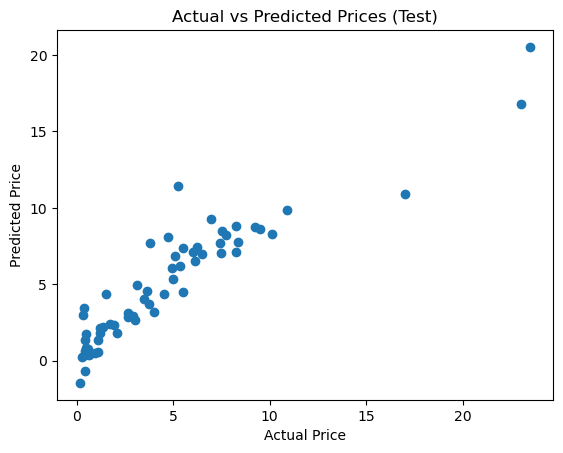

In [32]:
# Visualize the actual vs predicted prices on Testing data
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Test)")
plt.show()

Evaluating the Algorithm

In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 1.221761546233264
Mean Squared Error: 3.528927253890615
Root Mean Squared Error: 1.8785439185418624


In [34]:
from sklearn.metrics import r2_score

In [35]:
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score*100,"%")

r2 socre is  84.6805395765744 %


Prediction on New Data

In [36]:
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [37]:
lr.predict(data_new)

array([4.32741299])